In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv 
import math

def load_set():
    with open('heart.csv', 'r') as fin:
      data = fin.read().splitlines(True)
    data = data[1:] #remove the header row 
    numpy_array = np.loadtxt(data, delimiter=",")
    numpy_array_transpose = numpy_array.T 
    m_train = math.ceil (0.8 * numpy_array_transpose.shape[1])
    train_set_x_orig = numpy_array_transpose[0:numpy_array_transpose.shape[0]-1,0:m_train]
    train_set_y_orig = numpy_array_transpose[numpy_array_transpose.shape[0]-1:numpy_array_transpose.shape[0],0:m_train]
    test_set_x_orig = numpy_array_transpose [0:numpy_array_transpose.shape[0]-1, m_train:numpy_array_transpose.shape[1]]
    test_set_y_orig = numpy_array_transpose[numpy_array_transpose.shape[0]-1 : numpy_array_transpose.shape[0],m_train:numpy_array_transpose.shape[1]]
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s   

In [2]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w1 = np.zeros((dim, 1))
    w2 = np.zeros((dim, 1))
    w3 = np.zeros((2, 1))
    b1 = 0
    b2 = 0 
    b3 = 0
    ### END CODE HERE ###

    assert(w1.shape == (dim, 1))
    assert(isinstance(b1, float) or isinstance(b1, int))
    
    return w1,w2,w3, b1 ,b2,b3

In [3]:
def propagate(w1,w2,w3, b1,b2,b3, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    h11 = sigmoid(np.dot(X.T,w1) + b1)
    h22 = sigmoid(np.dot(X.T,w2) + b2)
    #H = np.concatenate([h1,h2])
    #H = np.reshape(H, (-1, 1))    # compute activation 
    H1 = np.zeros((2, 820))
    H1[0:1,:] = h11[:,0:1].T
    H1[1:2,:] = h22[:,0:1].T
    A = sigmoid(np.dot(H1.T,w3) + b3)          
    #print("A shape",A.shape)
    #print(H1.shape)
    cost = -(1/m) * np.sum(Y.T * np.log(A) + (1 - Y.T) * (np.log(1-A)) )                                 # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    
    dw1 = (1/m) * np.dot(X,(A-Y.T))

    db1 = (1/m) * np.sum(A-Y.T)
    
    dw2 = (1/m) * np.dot(X,(A-Y.T))

    db2 = (1/m) * np.sum(A-Y.T)
    
    dw3 = (1/m) * np.dot(H1,(A-Y.T))

    db3 = (1/m) * np.sum(A-Y.T)
    #print(Y.shape)
   # print(H1.shape)
   # print(H1)
   # print(w3.shape,dw3.shape)
    ### END CODE HERE ###
   # print (dw.shape)
    #print (w.shape)
    assert(dw1.shape == w1.shape)
    assert(db1.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw1": dw1,
             "db1": db1,
             "dw2": dw2,
             "db2": db2,
             "dw3": dw3,
             "db3": db3}
    
    return grads, cost

In [4]:
def optimize(w1,w2,w3, b1,b2,b3, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w1,w2,w3, b1,b2,b3, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw1 = grads["dw1"]
        db1 = grads["db1"]
        dw2 = grads["dw2"]
        db2 = grads["db2"]
        dw3 = grads["dw3"]
        db3 = grads["db3"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w1 = w1 - learning_rate * dw1
        b1 = b1 - learning_rate * db1
        w2 = w2 - learning_rate * dw2
        b2 = b2 - learning_rate * db2
        w3 = w3 - learning_rate * dw3
        b3 = b3 - learning_rate * db3
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w1": w1,
              "b1": b1,
              "w2": w2,
              "b2": b2,
              "w3": w3,
              "b3": b3}
    
    grads = {"dw1": dw1,
             "db1": db1,
             "dw2": dw2,
             "db2": db2,
             "dw3": dw3,
             "db3": db3}
    
    return params, grads, costs

In [5]:

def predict(w1,w2,w3,b1,b2,b3, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w1 = w1.reshape(X.shape[0], 1)
    w2 = w2.reshape(X.shape[0], 1)
    w3 = w3.reshape(2, 1)

    h1 = sum(sigmoid(np.dot(X.T,w1) + b1)) 
    h2 = sum(sigmoid(np.dot(X.T,w2) + b2)) 
    h11 = sigmoid(np.dot(X.T,w1) + b1)
    h22 = sigmoid(np.dot(X.T,w2) + b2)
    H = np.concatenate([h1,h2])
    H = np.reshape(H, (-1, 1))    # compute activation 
    H1 = np.zeros((2, X.shape[1]))
    H1[0:1,:] = h11[:,0:1].T
    H1[1:2,:] = h22[:,0:1].T
           


    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(H1.T,w3) + b3)  
    ### END CODE HERE ###
    #print(range(A.shape[1]))
    for i in range(A.shape[0]):        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        #pass
        if(A[i,0] > 0.5):
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
        ### END CODE HERE ###
        
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [6]:
def normalize(X_train,X_test):
    for i in range(X_train.shape[0]):  
      X_train[i,:] = X_train[i,:] / np.max(X_train[i,:])  
    for i in range(X_test.shape[0]):  
      X_test[i,:] = X_test[i,:] / np.max(X_test[i,:])
    return X_train , X_test   

train accuracy: 47.92682926829268 %
test accuracy: 51.707317073170735 %


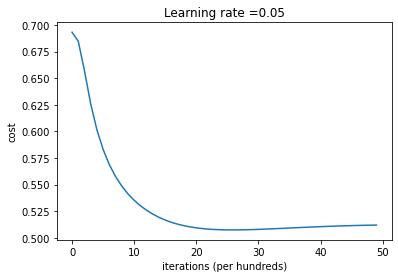

In [8]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)

    w1,w2,w3,b1,b2,b3 = initialize_with_zeros(X_train.shape[0])
    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w1,w2,w3, b1,b2,b3, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w1"]
    b = parameters["b2"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w1,w2,w3,b1,b2,b3, X_test)
    Y_prediction_train = predict(w1,w2,w3,b1,b2,b3, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

train_set_x, train_set_y, test_set_x, test_set_y= load_set()
train_set_x , test_set_x = normalize(train_set_x,test_set_x)
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 5000, learning_rate = 0.05, print_cost = False)
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()